In [1]:
# Get image statistics for all training images

from utils import MyDataset

dataset = MyDataset(
    paths=[
        '/Stor1/wout/TreeAI4Species/SemSeg/12_RGB_SemSegm_640_fL/train/', 
        '/Stor1/wout/TreeAI4Species/SemSeg/34_RGB_SemSegm_640_pL/train/',
    ],
    labels=[
        'full',
        'partial',
    ],
)

# mean, std = dataset.get_img_stats()
# mean = dataset.image_channels_mean
# std = dataset.image_channels_std
# print(mean, std)



/home/wvandenbroeck/miniconda3/envs/treeai/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


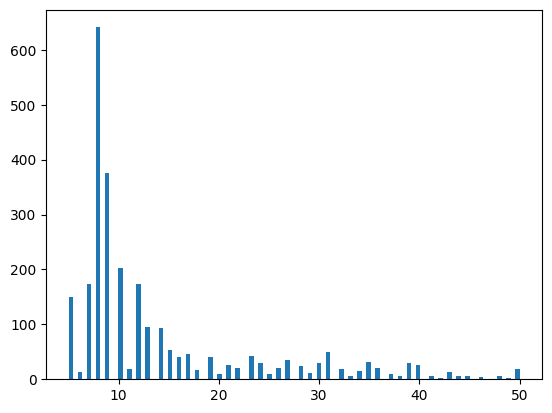

5.0 50.0


In [ ]:
from utils import get_sample_weights, get_class_count
import matplotlib.pyplot as plt
import numpy as np


sw = get_sample_weights(dataset, 62)

plt.hist(sw, bins=100)
plt.show()

print(np.min(sw), np.max(sw))

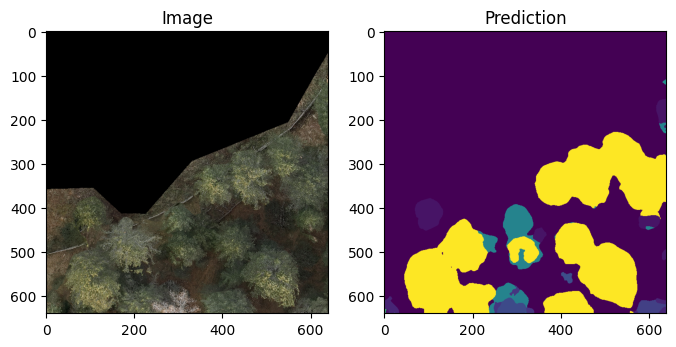

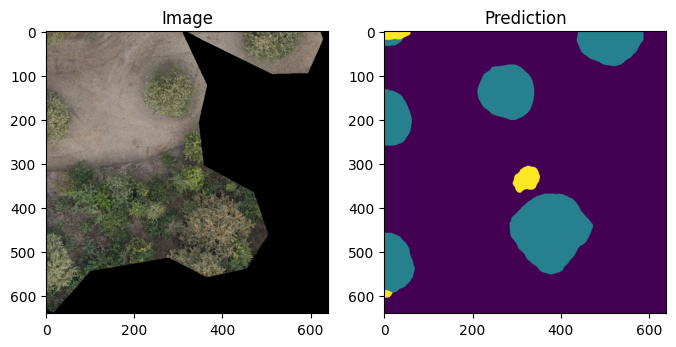

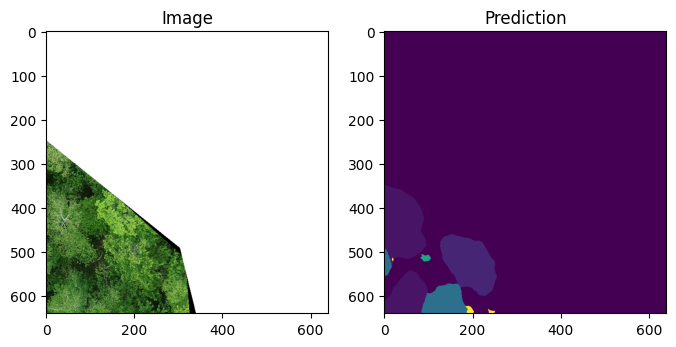

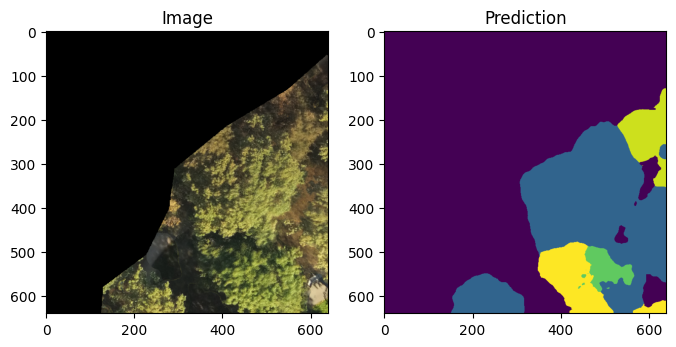

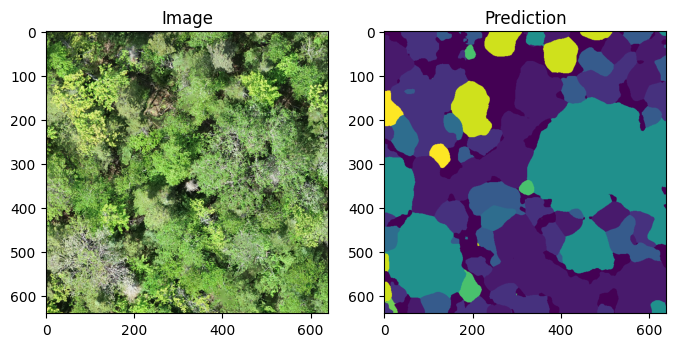

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

path_test = '/Stor1/wout/TreeAI4Species/test_submission/SemSeg_test-images/images/'
path_prediction = '/Stor1/wout/TreeAI4Species/test_submission/SemSeg_test-images/predictions/'
filenames = os.listdir(path_test)

idx = np.random.randint(len(filenames), size=5)
for id in idx:
    filename = filenames[id]
    path_image = path_test + filename
    path_pred = path_prediction + filename[:-3] + 'npy'

    # Load image and corresponding prediction
    with Image.open(path_image) as im:
        image = np.array(im)
    pred = np.load(path_pred)

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(image)
    axes[0].set_title('Image')
    axes[1].imshow(pred)
    axes[1].set_title('Prediction')
    plt.show()
